In [2]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nose.tools import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_004f2b1443974cf3b6829eeb54e2d904 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='1beLpFPSq2YJHFpf5uudzwwv3D9kcYKjwn3l_J7sCnsO',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_004f2b1443974cf3b6829eeb54e2d904.get_object(Bucket='smartinternz-donotdelete-pr-ofwjwo3f4tnbxk',Key='life_expectancy.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,country,country_code,region,income_group,year,adult _mortality,infant deaths,alcohol,Income_composition_of_resources,bmi,schooling,life_expectancy
0,Afghanistan,AFG,South Asia,Low income,2000,263.0,62,0.01,0.479,19.1,10.1,55.125878
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2000,271.0,64,0.01,0.476,18.6,10.0,45.204780
2,Albania,ALB,Europe & Central Asia,Upper middle income,2000,268.0,66,0.01,0.470,18.1,9.9,74.271537
3,United Arab Emirates,ARE,Middle East & North Africa,High income,2000,272.0,69,0.01,0.463,17.6,9.8,74.451537
4,Argentina,ARG,Latin America & Caribbean,Upper middle income,2000,275.0,71,0.01,0.454,17.2,9.5,73.755805


In [5]:
data.columns

Index(['country', 'country_code', 'region', 'income_group', 'year',
       'adult _mortality', 'infant deaths', 'alcohol',
       'Income_composition_of_resources', 'bmi', 'schooling',
       'life_expectancy'],
      dtype='object')

In [6]:
data = data.groupby('country').mean()
data.head()

,year,adult _mortality,infant deaths,alcohol,Income_composition_of_resources,bmi,schooling,life_expectancy
country,,,,,,,,
Afghanistan,2005.5,204.083333,42.750000,3.233333,0.594702,22.916667,11.219048,57.229445
Albania,2005.5,171.833333,45.833333,3.153333,0.563961,25.458333,11.025170,76.010102
Algeria,2005.5,194.666667,9.166667,5.478333,0.631667,40.391667,11.283333,72.275400
Angola,2005.5,172.166667,44.333333,3.142500,0.592082,22.308333,11.088776,48.506652
Antigua and Barbuda,2005.5,194.416667,41.333333,2.597083,0.584978,27.641667,11.804082,74.484630


In [9]:
data.columns

Index(['year', 'adult _mortality', 'infant deaths', 'alcohol',
       'Income_composition_of_resources', 'bmi', 'schooling',
       'life_expectancy'],
      dtype='object')

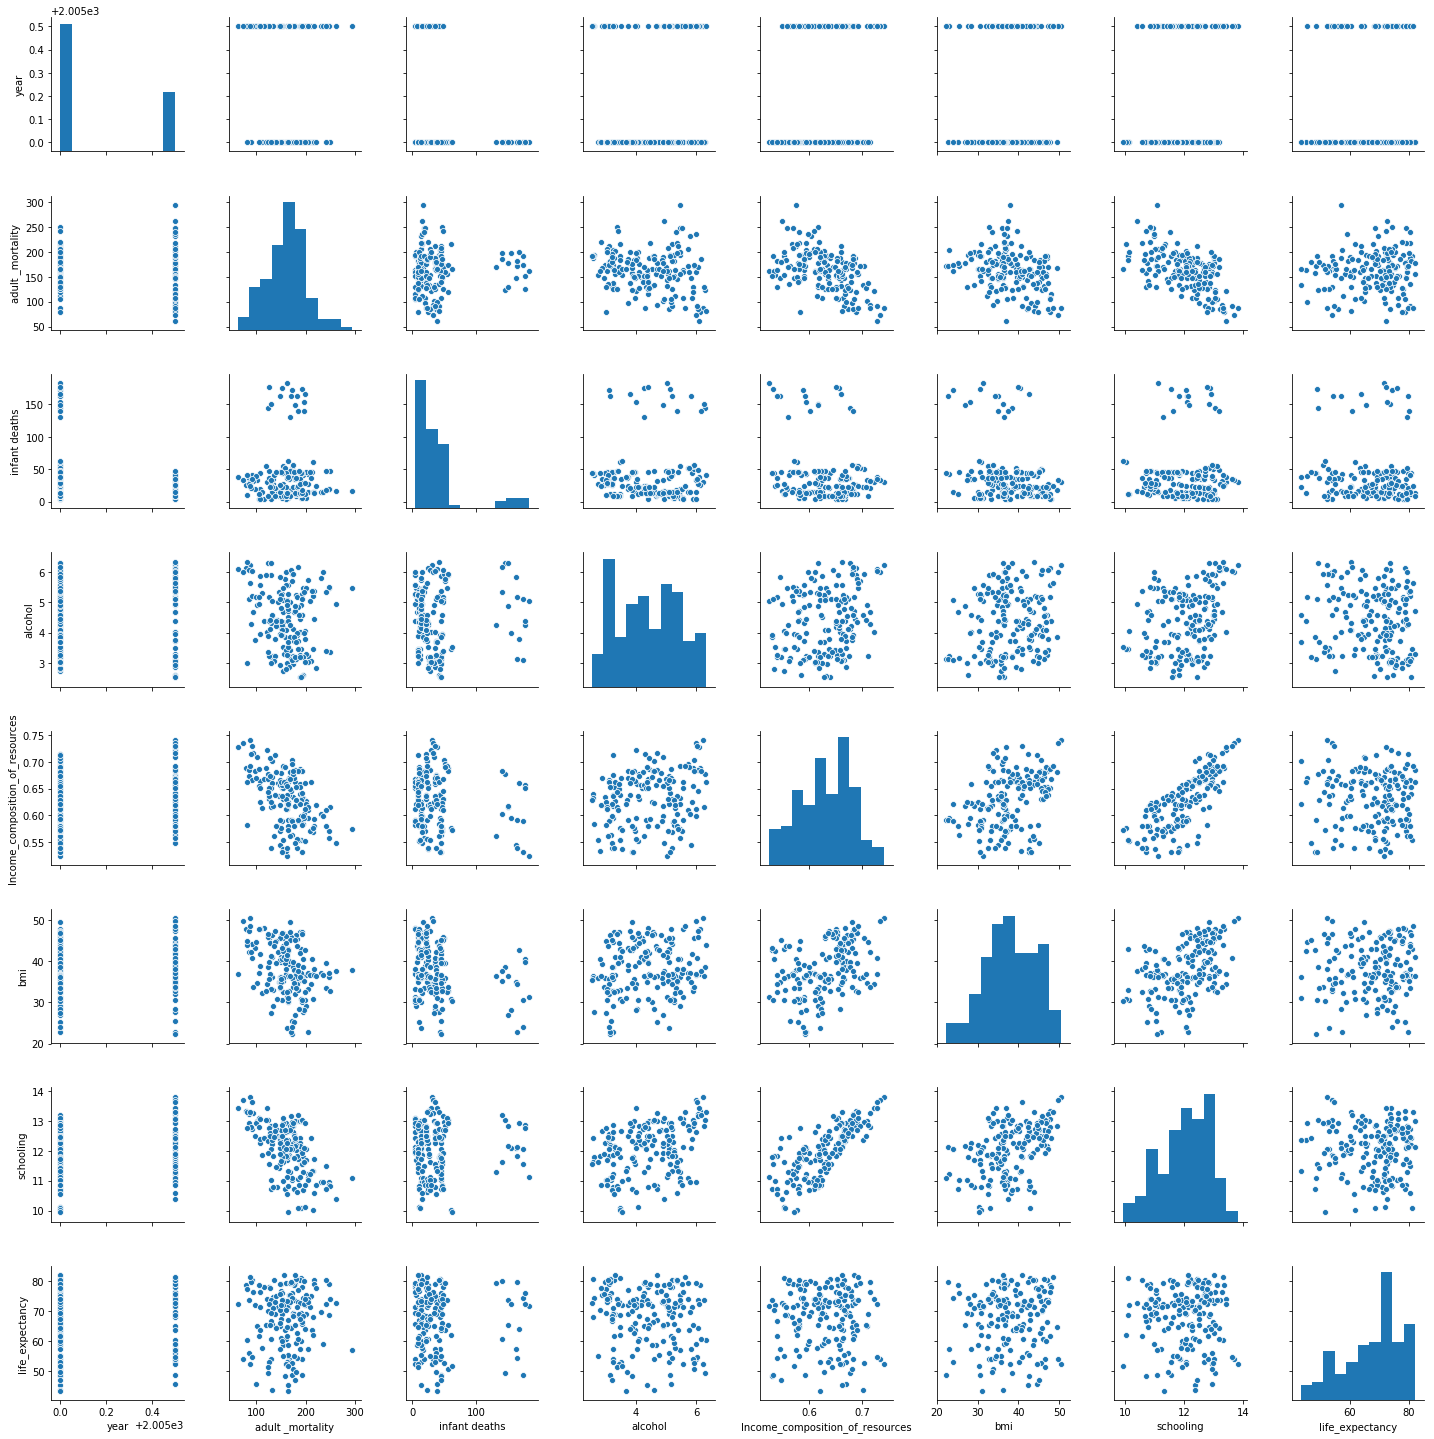

In [7]:
sns.pairplot(data)

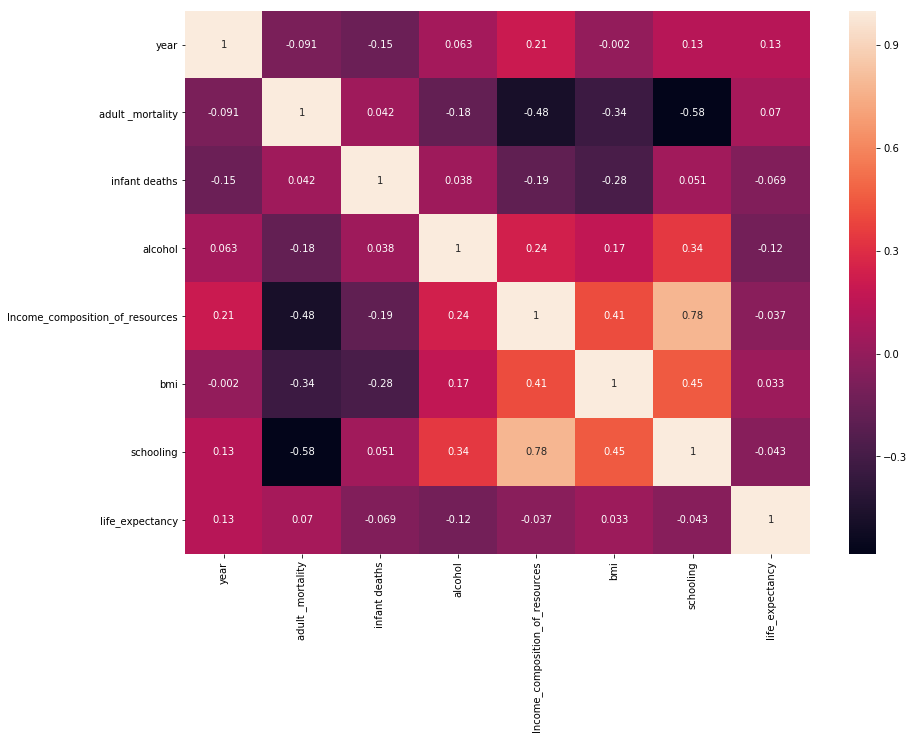

In [8]:
plt.figure(figsize = (14, 10))
sns.heatmap(data.corr(), annot = True)

In [9]:
labels = data['life_expectancy']
features = data.drop('life_expectancy', axis = 1)

In [10]:
features.isnull().sum()

year                               0
adult _mortality                   0
infant deaths                      0
alcohol                            0
Income_composition_of_resources    0
bmi                                0
schooling                          0
dtype: int64

In [11]:
features.fillna(value = features.mean(), inplace = True)

In [12]:
labels.fillna(value = labels.mean(), inplace = True)

In [13]:
stats.describe(features[1:])

DescribeResult(nobs=178, minmax=(array([2.00500000e+03, 6.17500000e+01, 4.00000000e+00, 2.52250000e+00,
       5.24909091e-01, 2.23083333e+01, 9.93525046e+00]), array([2.00550000e+03, 2.94375000e+02, 1.82818182e+02, 6.34416667e+00,
       7.40833333e-01, 5.03583333e+01, 1.38166667e+01])), mean=array([2.00515730e+03, 1.61473442e+02, 3.76849251e+01, 4.41369425e+00,
       6.31111448e-01, 3.80662326e+01, 1.20431423e+01]), variance=array([5.42118961e-02, 1.56203906e+03, 1.69824274e+03, 1.04110325e+00,
       2.48232135e-03, 3.72286823e+01, 7.06288825e-01]), skewness=array([ 0.79849097,  0.04430867,  2.31865733,  0.02602939, -0.17994391,
       -0.18358346, -0.38055772]), kurtosis=array([-1.36241218,  0.43836003,  4.57816441, -1.12802298, -0.74337579,
       -0.49629365, -0.50899624]))

In [14]:
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

In [15]:
features

array([[1.        , 0.61185742, 0.21670056, ..., 0.32323045, 0.02168746,
        0.33075483],
       [1.        , 0.47322228, 0.2339434 , ..., 0.18085877, 0.11229947,
        0.28080462],
       [1.        , 0.5713774 , 0.02889341, ..., 0.49442144, 0.64468212,
        0.34731727],
       ...,
       [0.        , 0.43642226, 0.18301983, ..., 0.06872128, 0.36495976,
        0.16146584],
       [0.        , 0.50989204, 0.18505338, ..., 0.48347198, 0.39574893,
        0.38569209],
       [0.        , 0.44501978, 0.19471276, ..., 0.44707496, 0.31472479,
        0.35844652]])

In [16]:
life_features_train, life_features_test, life_labels_train, life_labels_test = train_test_split(
        features, labels, train_size = 0.7, test_size = 0.3)

In [17]:
#random forest
random_forest_model = RandomForestRegressor()

In [18]:
random_forest_fit = random_forest_model.fit(life_features_train, life_labels_train)

In [19]:
random_forest_score = cross_val_score(random_forest_fit, life_features_train, life_labels_train, cv = 5)

In [20]:
print("mean cross validation score: %.2f"% np.mean(random_forest_score))
print("score without cv: %.2f"% random_forest_fit.score(life_features_train, life_labels_train))
print("R^2 score on the test data %.2f"%r2_score(life_labels_test, random_forest_fit.predict(life_features_test)))


mean cross validation score: -0.33
score without cv: 0.85
R^2 score on the test data -0.16


In [51]:
rf1 = random_forest_model.predict(life_features_test)

In [32]:
scoring = make_scorer(r2_score)

In [33]:
grid_cv = GridSearchCV(RandomForestRegressor(),param_grid={'min_samples_split': range(2, 10)},scoring=scoring, cv=5, refit=True)

In [34]:
grid_cv.fit(life_features_train, life_labels_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(2, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(r2_score), verbose=0)

In [35]:
grid_cv.best_params_

{'min_samples_split': 4}

In [36]:
result = grid_cv.cv_results_

In [37]:
print("Best Parameters: " + str(grid_cv.best_params_))

Best Parameters: {'min_samples_split': 4}


In [38]:
result = grid_cv.cv_results_

In [39]:
print("R^2 score on training data: %.2f"  % grid_cv.best_estimator_.score(life_features_train, life_labels_train))
print("R^2 score: %.2f"% r2_score(life_labels_test, grid_cv.best_estimator_.predict(life_features_test)))
print("Mean squared error: %.2f"% mean_squared_error(life_labels_test, random_forest_model_predict))
print("Mean absolute error: %.2f"% mean_absolute_error(life_labels_test, random_forest_model_predict))

R^2 score on training data: 0.75
R^2 score: -0.24
Mean squared error: 81.27
Mean absolute error: 7.05


In [42]:
!pip install watson-machine-learning-client

In [43]:
wml_credentials={
  "apikey": "oPJlD5-Fo6wB92f06zu6L07c7KsZ8JJgJn1HvZPau3xT",
  "iam_apikey_description": "Auto-generated for key 2f7ec383-b053-44a6-a6df-f4cb5a71a678",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/30a918781c634f4693f1a5fd52fc8c02::serviceid:ServiceId-8fbe18cd-24b4-4a63-ad80-da6ef289aef6",
  "instance_id": "65034068-3097-4b7c-88bd-77f7cf00939e",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [46]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [47]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [48]:
metadata={
    client.repository.ModelMetaNames.DESCRIPTION:'Life-Expectancy',
    client.repository.ModelMetaNames.AUTHOR_NAME:'Kunal',
    client.repository.ModelMetaNames.NAME:"Multilinear",
    client.repository.ModelMetaNames.FRAMEWORK_NAME:"scikit-learn",
    client.repository.ModelMetaNames.FRAMEWORK_VERSION:"0.22"
    
}

In [52]:
model_details=client.repository.store_model(random_forest_model,meta_props=metadata)


In [53]:
published_model_uid=client.repository.get_model_uid(model_details)
published_model_uid

'39f1b9d1-513f-4534-8414-bee8b9cd81cc'

In [54]:
created_deployment=client.deployments.create(published_model_uid,name="LR")




#######################################################################################

Synchronous deployment creation for uid: '39f1b9d1-513f-4534-8414-bee8b9cd81cc' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='49f88f4a-24b1-4a68-8164-a44756298839'
------------------------------------------------------------------------------------------------




In [57]:
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)
scoring_endpoint


'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/65034068-3097-4b7c-88bd-77f7cf00939e/deployments/49f88f4a-24b1-4a68-8164-a44756298839/online'

In [58]:
client.deployments.list()

------------------------------------  ----  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME  TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
49f88f4a-24b1-4a68-8164-a44756298839  LR    online  DEPLOY_SUCCESS  2020-06-08T07:53:43.410Z  scikit-learn-0.20  model
------------------------------------  ----  ------  --------------  ------------------------  -----------------  -------------
